<a href="https://colab.research.google.com/github/Priyanshuu-2109/ML_algorithmsFromScratch/blob/main/K_MeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [67]:
import matplotlib.pyplot as plt #for visualization
import numpy as np #for array operations like mean, norm
from sklearn.datasets import make_blobs #to generate syntethic daata divided into clusters

#Generating synthetic dataset for k-means

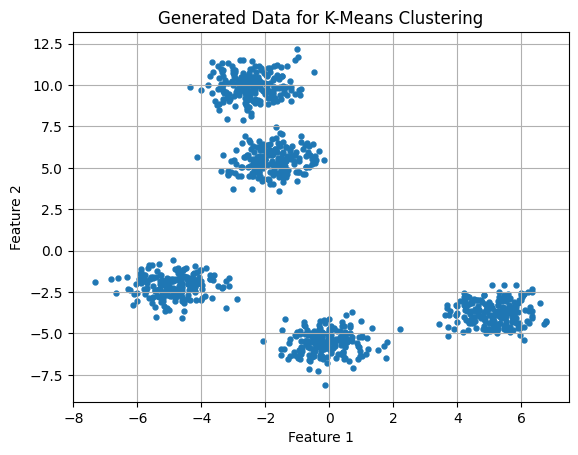

[[-4.65862391 -1.49341184]
 [-3.3092041  -2.22091265]
 [-0.24330727 -5.23069684]
 ...
 [-2.34086817  4.79608449]
 [-4.54368605 -3.61928613]
 [-1.64912814 10.58968647]]
[1 1 0 4 1 2 4 0 3 0 3 0 0 3 3 1 0 1 2 2 1 1 4 2 0 3 3 2 0 0 3 3 0 0 1 1 4
 0 4 0 3 4 3 0 2 1 2 2 0 4 1 1 3 3 4 2 3 1 1 2 4 3 3 2 2 4 3 1 3 0 1 3 3 1
 2 3 0 1 0 2 4 0 3 0 4 4 0 0 0 0 3 3 0 1 4 0 4 1 1 4 1 4 3 2 1 3 3 4 4 1 3
 4 0 4 2 1 4 3 3 4 3 4 2 4 2 4 3 4 3 3 1 4 3 3 4 2 1 0 1 1 1 0 2 0 0 2 0 3
 3 2 4 0 4 4 0 1 2 3 2 0 0 0 1 1 2 1 0 4 1 4 3 1 3 4 2 4 1 2 0 3 3 1 3 0 2
 2 2 3 1 2 4 2 0 4 2 2 0 4 2 2 2 0 4 4 3 0 2 2 1 4 4 0 4 4 0 2 0 1 1 0 3 3
 2 4 0 2 4 1 1 1 2 2 2 2 4 3 2 3 4 3 1 3 3 4 0 3 1 1 1 3 1 1 4 4 2 3 2 4 4
 3 4 2 1 0 0 3 4 4 0 4 1 0 2 1 0 1 0 1 0 2 4 0 3 0 0 0 4 4 0 2 1 4 3 4 4 2
 2 2 0 1 4 1 3 4 1 0 0 2 0 0 2 0 3 2 2 2 1 4 2 1 2 3 2 2 2 2 1 1 0 3 3 4 4
 0 1 1 3 4 2 4 3 1 0 2 2 3 1 3 3 4 4 2 2 0 3 1 4 1 0 3 3 4 2 3 2 3 3 2 2 2
 4 1 1 0 4 4 1 0 2 2 2 3 1 2 2 4 3 4 4 3 3 0 1 1 0 3 3 4 1 4 4 2 0 1 1 3 4
 3 1 2 

In [68]:
# Generate data
K = 5 #Number of clusters
N = 1000 # Number of datapoints

X, y_true = make_blobs(n_samples=N, centers=K, cluster_std=0.7, random_state=50)


# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1], s=50,marker = '.')
plt.title("Generated Data for K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
print(X)
print(y_true)

#Randomly choosing the initial set of centroids

[[-0.93765525  5.59509534]
 [ 5.65149289 -2.87115335]
 [-1.61148349  5.3464433 ]
 [-2.19208724  5.22037036]
 [-4.66563132 -1.42913268]]


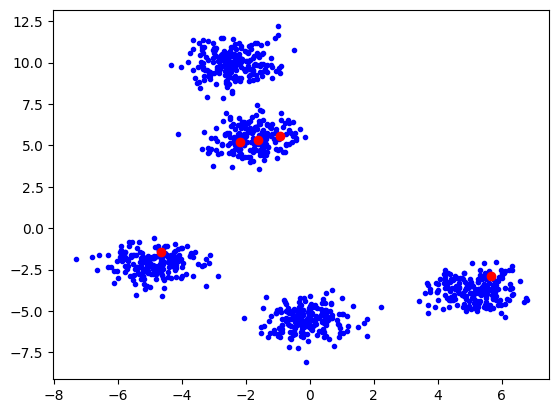

In [69]:
#Choose initital set of centroids

initialCentroids = X[np.random.choice(X.shape[0], 5, replace=False)] #chooses random 5 points from the dataset to be initial centroids
print(initialCentroids)

#Plotting the initial centroids with the datapoints
plt.scatter(X[:,0],X[:,1],c = 'blue',marker = '.');
plt.scatter(initialCentroids[:,0],initialCentroids[:,1],c = 'red')
plt.show()

#Function that returns the closest centroid to the fiven datapoint

In [70]:
#Function that takes input a point and the set of centroids and returns the cluster index to which the point belongs
def closestCentroid(point, centroids):
  min = np.linalg.norm(point - centroids[0])
  cluster = 0
  k = len(centroids)
  for i in range(k):
    dist = np.linalg.norm(point - centroids[i]) #L2 norm between centroids and datapoints; euclidian distance
    # print(i,' ',dist)
    if dist < min: #updating the closest cluster to which the datapoint belongs
      min = dist
      cluster = i
  return cluster #returns the index of the nearest cluster

#Mapping the datapoints to the cluster index to which it belongs

In [71]:
def assignDatapointsToClusters(X, centroids):
  clusters = {i: [] for i in range(k)} #initializing a dicitionary; will be adding belonging to the corresponding cluster index as key in this dictionary
  for i in range(N): #for each datapoint
    closest = closestCentroid(X[i], centroids) #finds the centroid closest to the given datapoint to determine the cluster to which it belongs
    clusters.setdefault(closest, []).append(X[i]) # mapping the datapoint to the key of the cluster index to which it belongs
  return clusters



#Function for visualization of results

In [72]:
# Helper function to visualize the centroid movements with each iteration
def plot(X, centroids, clusters, i):
  plt.scatter(X[:,0],X[:,1],c = 'blue',marker = '.');
  plt.scatter(centroids[:,0],centroids[:,1],c = 'red')
  plt.title("Iteration "+str(i))
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.grid(True)
  plt.show()

#Main code that performs k-means clustering for 100 iterations

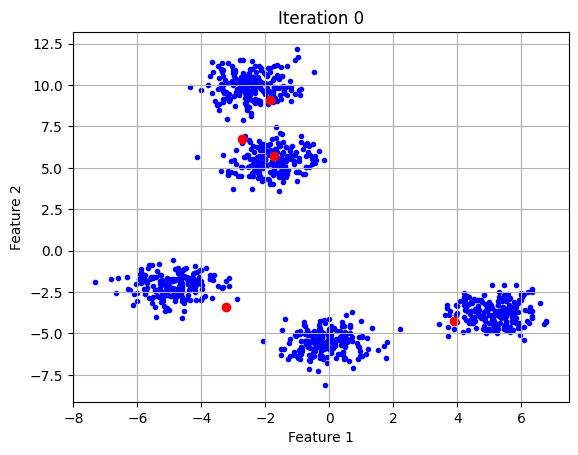

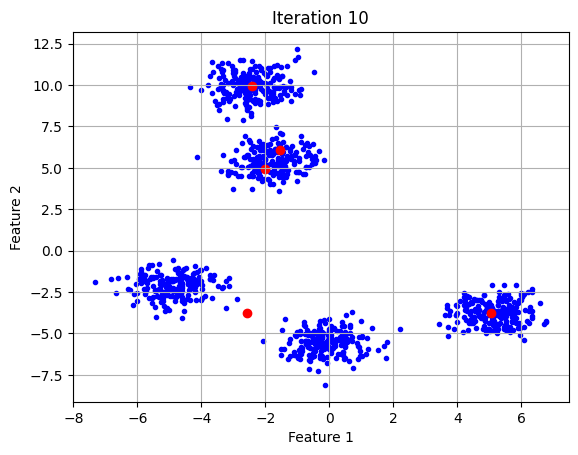

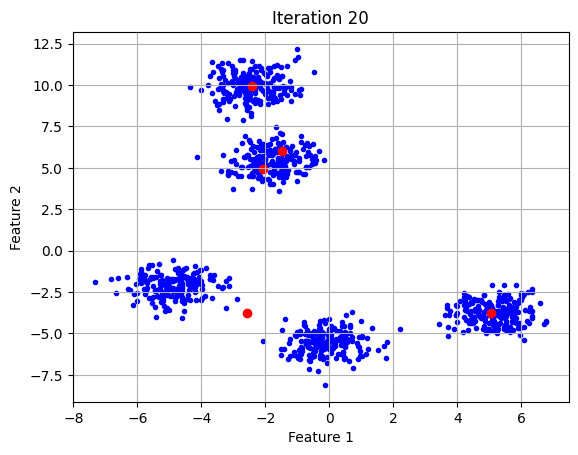

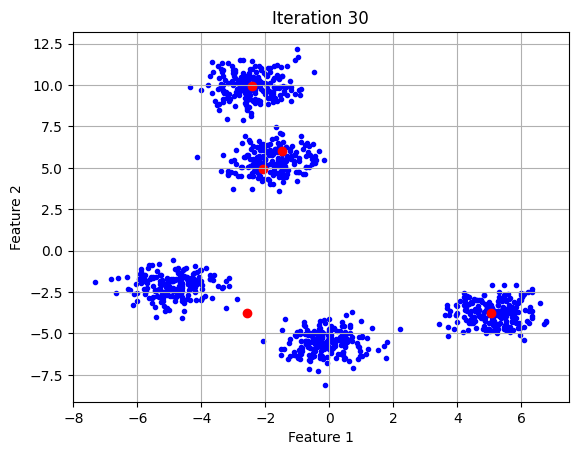

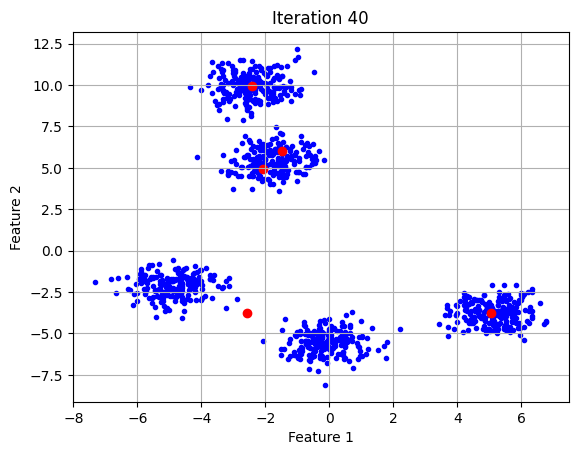

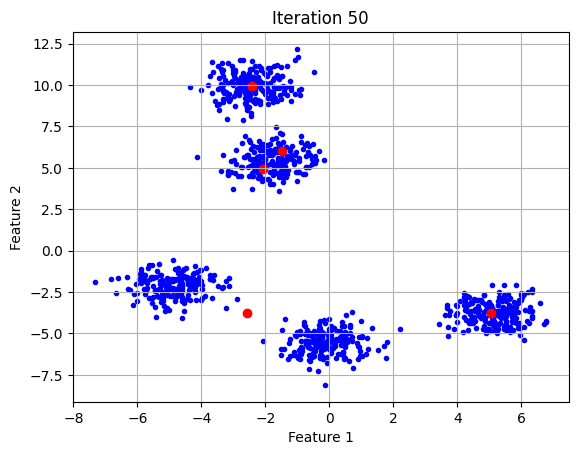

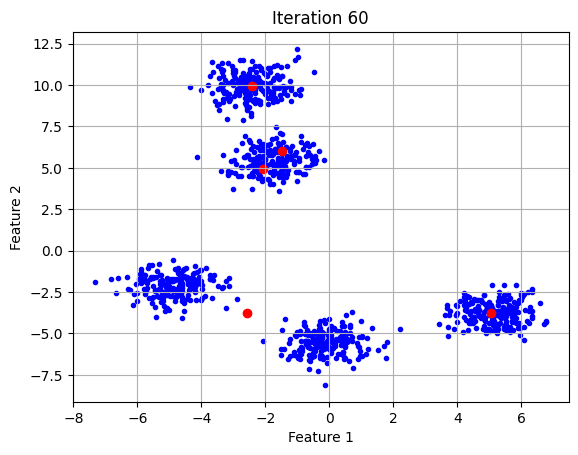

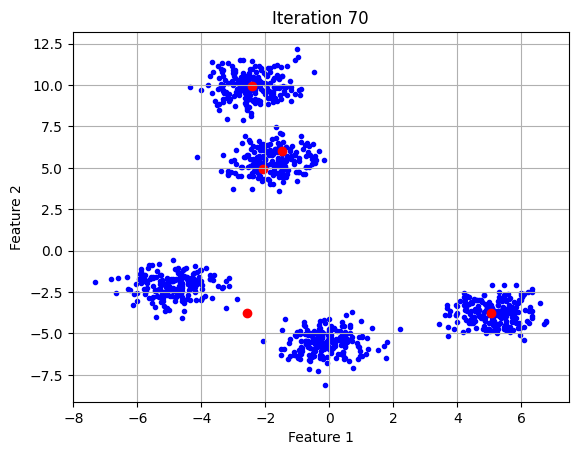

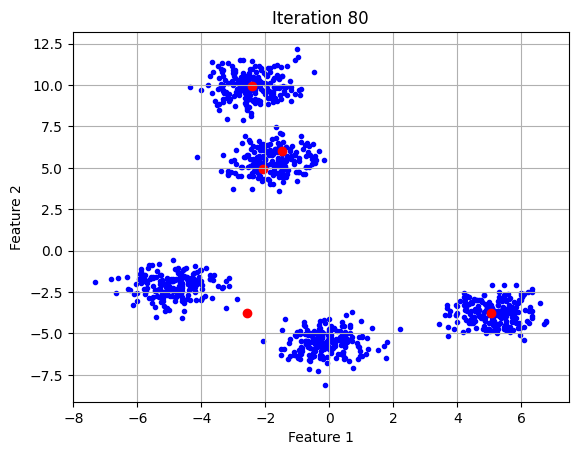

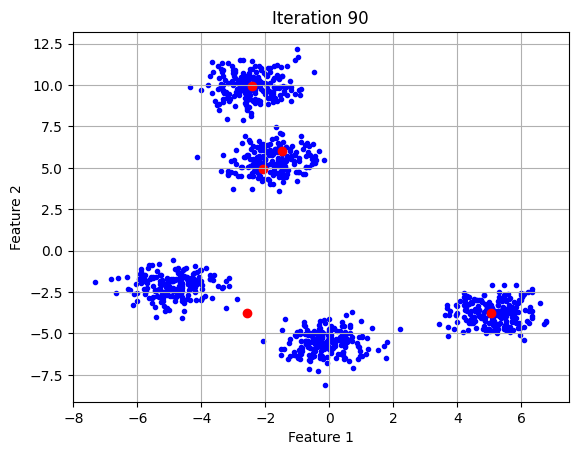

In [73]:
#iterations
for i in range(100): #running k means for 100 iterations; can be changed to a stopping criterion depending on change in distortion between iterations. abhi time nahi hai to aise hi kar diya
  clusters = assignDatapointsToClusters(X, initialCentroids) # a dictionary that contains all the datapoints mapped to theire respective clusters
  # print(clusters)
  newCentroids = np.zeros(initialCentroids.shape)
  for j in range(k):
    if len(clusters[j]) > 0:  # Check if cluster is not empty
        newCentroids[j] = np.mean(clusters[j], axis=0)
    else:
        newCentroids[j] = initialCentroids[j]
  # print(newCentroids)
  initialCentroids = newCentroids.copy()

  if i%10==0:
    plot(X, initialCentroids, clusters,i)



